# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Структура датасета, инфа


In [6]:
import seaborn as sb
import matplotlib.pyplot as mp
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
print(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

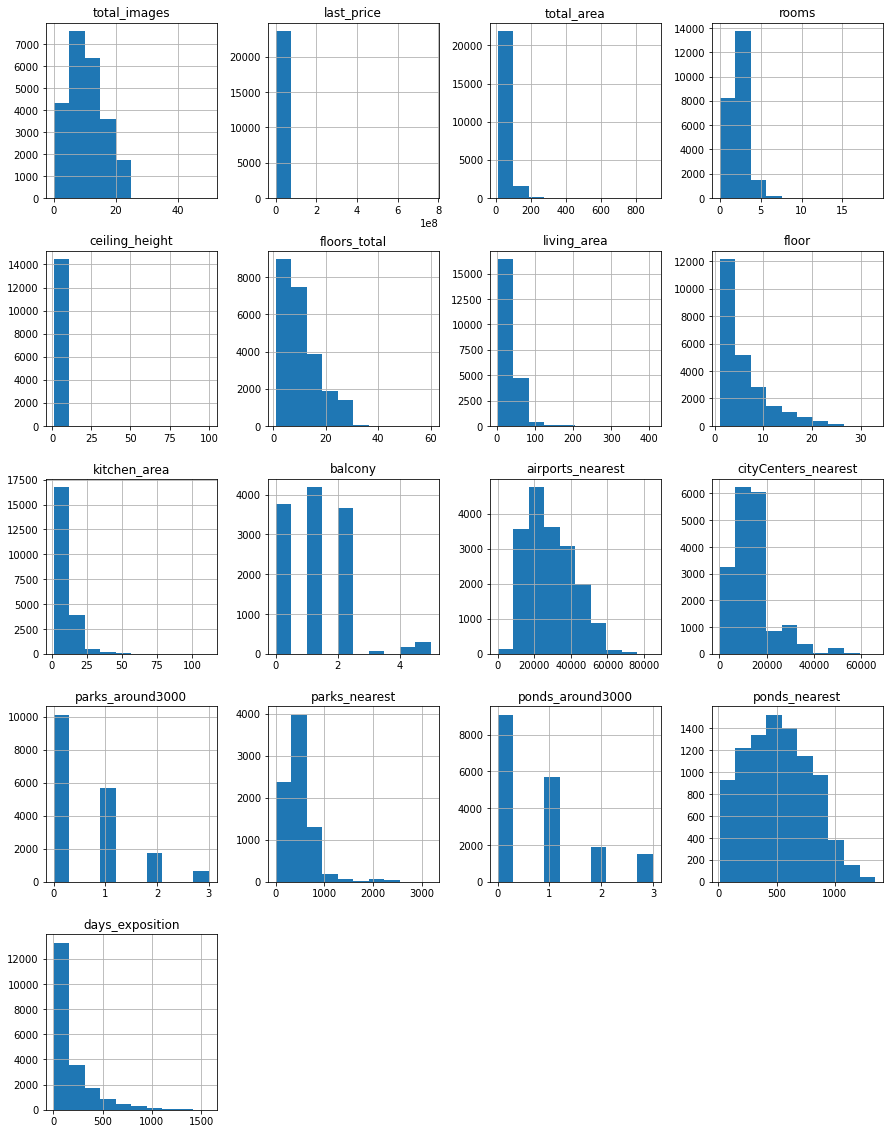

In [4]:
data.hist(figsize=(15,20))

### Предобработка данных

#### Переименование столбцов


In [5]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'})
list(data)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

#### Дубликаты


Начнем с дубликатов. Надо убедиться, что среди названий населенных пунктов нет неявных дубликатов. 

In [6]:
data['locality_name'] = data['locality_name'].str.lower() #облегим себе жизнь и приведем названия населенных пунктов к нижнему регистру

In [7]:
data['locality_name'].unique() 

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [8]:
#data['locality_name'] = data['locality_name'].replace('ё', 'е')
for name in data['locality_name'].unique() :
    if 'ё' in str(name) :
        data.loc[data['locality_name'] == name, 'locality_name'] = name.replace('ё', 'е') #заменим ё на ё везде

data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [7]:
display(data['locality_name'])
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
display(data['locality_name'])

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

Избавимся от дубликатов. Дубликатами будем считать те позиции, которые идентичны по пяти самым значимым параметрам. Под нож могли попасть и обычные совпадения, но хочется верить, что дубликатов таким образом было удалено больше.

In [9]:
data = data.drop_duplicates(subset = ['locality_name', 'floor', 'rooms', 'total_area', 'living_area'], keep='first').reset_index(drop=True)


#### Пропуски и аномалии

##### Высота потолков:
Сначала избавимся от аномальных значений. Аномальными будем считать потолки ниже 2-х метров и выше 6-и(потолки 6 метров возможны в пентхаусах).
Пропусков довольно много, и думаю, что их можно заполнить медианным значением. Высота потолков в большинстве квартир стандартна, это же показывает и маленький разброс в гистограме. Еще я думаю, что если человек не указал высоту потолка в квартире, значит, с большей вероятностью, это стандартная высота. Не предупредить о 2-х метровых потолках - нечестно, а не указать о преимуществе в виде 6-метровых потолков - глупо.

In [10]:
data['ceiling_height'].sort_values(ascending=True).head(50) #ищу аномально большие или аномально маленькие значения
data['ceiling_height'].sort_values(ascending=False).head(50)
data['ceiling_height'] = data['ceiling_height'].astype('float')
data = data.loc[(2.30 <= data['ceiling_height']) & (data['ceiling_height'] <= 6.00) | (data['ceiling_height'].isna())] #избавляюсь от них


In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()


0

##### Про floors_total 
Пропусков всего 86 - это мало. Лучше удалить эти строки.

In [12]:
data = data.query('~floors_total.isna()')


##### iving_area
Тут можно постараться и заполнить наиболее вероятным значением. Надо понять, какое в среднем отношение жилой зоны к общей, и умножить эту величину на значение общей зоны в строках с пропусками в living_area.


In [13]:
data.query('open_plan == True')[['living_area', 'total_area']].head(50) #проверил, как работает соотношение жилой площади к общей в случае квартир с открытой планировкой.
data.query('studio == True')[['living_area', 'total_area']].head(10) #проверил, как работает соотношение жилой площади к общей в студиях


,living_area,total_area
144,15.50,27.00
440,24.75,27.11
608,NaN,25.00
697,17.50,24.10
716,12.00,17.00
1172,17.00,29.00
1173,18.00,32.00
1219,20.00,27.00
1259,16.00,27.00
1275,17.38,26.00


In [14]:
living_to_total = pd.Series(data['living_area'] / data['total_area'])
median_living_to_total = living_to_total.median()
median_living_to_total

0.5684210526315789

In [15]:
data['living_area'] = data['living_area'].fillna(median_living_to_total * data['total_area'])
data['living_area'].isna().sum()


0

In [16]:
data['living_area'].describe()
data[['living_area', 'last_price']].sort_values(by='living_area', ascending=False).head(20) #квартиры в 400 кв. метров показались подозрительными, поэтому на всякий проверил, как дела обстоят с их ценой.

,living_area,last_price
18486,409.700000,420000000.0
5256,409.000000,65000000.0
3085,358.673684,140000000.0
11910,347.500000,91500000.0
4169,332.000000,50000000.0
12340,322.300000,140000000.0
660,312.500000,49950000.0
7810,301.500000,84000000.0
13490,300.000000,51000000.0
5774,284.210526,230000000.0


##### is_apartment
Тут самый разумный вариант - поставить фолс вместо пропусков. Я думаю, что это работает по такому принципу: если квартира является апартаментами, то об этом обязательно напишут (так как это очень важная информация). Однако, указывать о том, что квартира не является апартаментами - слишком мелочно.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()


0

##### kitchen_area
Я думаю, тут можно сделать по аналогии с площадью жилой зоны. Можно найти среднее соотношение размера кухни и общей площади квартиры. 
Однако надо быть осторожными с квартирами-студиями. Посмотрим, как размеры кухонь выглядят у них.


In [18]:
data.loc[data['studio'] == True]['kitchen_area'].unique()


array([nan])

Это было ожидаемо, но проверка лишней не бывает. В студиях не пишут площадь кухни, так как кухня там не является отдельным помещением. Поэтому вместо пропусков в китчен ареа для студий поставим нули.

In [19]:
median_kitchen_to_total = pd.Series(data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'] = data['kitchen_area'].fillna(median_kitchen_to_total * data['total_area'])
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data['kitchen_area'].isna().sum()

0

Изучим аномально большие кухни и посмотрим на отношение их площади к площади всей квартиры

In [20]:
data['kitchen_area'].describe()
data[['kitchen_area', 'total_area', 'last_price']].sort_values(by='kitchen_area', ascending=False).head(20)

,kitchen_area,total_area,last_price
18486,112.000000,900.0,420000000.0
19101,107.000000,249.7,85000000.0
2467,100.700000,255.0,12500000.0
5256,100.000000,590.0,65000000.0
15461,93.200000,181.1,82400000.0
15963,93.000000,146.0,65850000.0
10468,87.200000,177.9,56844500.0
14345,85.864614,500.0,150000000.0
9513,84.851411,494.1,43185328.0
492,77.000000,216.0,95000000.0


Удалим квартиры с аномальным соотношением кухни к общей площади

In [21]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data = data.query('kitchen_to_total <= 0.5')


##### balcony
Только очень неразумный риелтор не укажет наличие балкона, если он действительно имеется в квартире. Поэтому можно заполнить пропуски нулями.

In [22]:
data['balcony'] = data['balcony'].fillna(0)


In [23]:
data['balcony'].describe()
data[['balcony', 'total_area', 'last_price']].sort_values(by='balcony', ascending=False).head(20)


,balcony,total_area,last_price
18642,5.0,66.2,6100000.0
16625,5.0,95.0,11500000.0
14352,5.0,42.3,5000000.0
18000,5.0,52.4,4887000.0
3604,5.0,60.0,5100000.0
12660,5.0,79.2,5000000.0
12347,5.0,100.0,8200000.0
16631,5.0,73.9,11000000.0
11457,5.0,86.1,9900000.0
9296,5.0,116.0,15000000.0


А вот тут совершенно точно нереалистичные значения. Однако просто взять и отрезать квартиры с 4-5 балконами будет нечестно, среди них могут большие и дорогие квартиры, для которых это значение является реалистичным. Поэтому отрежем квартиры с 4-5 балконами и площадью менее 300 кв.

In [24]:
data = data.loc[(data['balcony'] <= 3) | ((data['balcony'] > 3) & (data['total_area']) >= 300)]


##### locality_name 
Лучше удалить эти строки. Пропусков немного, а название местности - важный параметр.


In [25]:
data = data.query('~locality_name.isna()')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21552 entries, 0 to 22244
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21552 non-null  int64  
 1   last_price            21552 non-null  float64
 2   total_area            21552 non-null  float64
 3   first_day_exposition  21552 non-null  object 
 4   rooms                 21552 non-null  int64  
 5   ceiling_height        21552 non-null  float64
 6   floors_total          21552 non-null  float64
 7   living_area           21552 non-null  float64
 8   floor                 21552 non-null  int64  
 9   is_apartment          21552 non-null  bool   
 10  studio                21552 non-null  bool   
 11  open_plan             21552 non-null  bool   
 12  kitchen_area          21552 non-null  float64
 13  balcony               21552 non-null  float64
 14  locality_name         21552 non-null  object 
 15  airports_nearest   

 
##### parks_around_3000, ponds_around_3000

Пропуски в этих столбцах я бы заменил на 0 по следующим причинам: 
   1) По аналогии с балконами, опираясь на предпосылку о рациональности риелторов, в округе попросту нет прудов или парков.
   2) Судя по гистограммам, 0 - это наиболее вероятное значение.
   
Выходя за рамки имеющихся возможностей, я бы прежде всего обратился в тех.отдел. Эти параметры - картографические, то есть собраны они тех.отделом Яндекс.недвижимости. Также, думаю, они были собраны автоматически. Скорее всего, произошла какая-то ошибка при сборе или выгрузке данных. На это указывает и тот факт, что количество пропусков в этих столбцах полностью совпадает. Кстати, это же касается и расстояний до ближайшего аэропорта и центра.

In [26]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data[['parks_around_3000', 'ponds_around_3000']].isna().sum()

parks_around_3000    0
ponds_around_3000    0
dtype: int64

In [27]:
data['parks_around_3000'].describe()
data['ponds_around_3000'].describe()

count    21552.000000
mean         0.589272
std          0.887120
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

##### parks_nearest, ponds_nearest
Если задать ограничение по значениям в 1000, то становится понятно, что гистограммы этих столбцов очень походят друг на друга, и распределения их значений являются нормальными. Из этого можно предположить, что пруды и парки чаще всего распологаются вместе (здравый смысл на это тоже указывает). 
Поэтому можно заполнить пропуски в них таким образом: в строке, где указан пруд, но не указан парк, вместо пропуска ставим расстояние до пруда, и наоборот.
Осталось понять, много ли строк, где нет ни того, ни другого.

<AxesSubplot:ylabel='Frequency'>

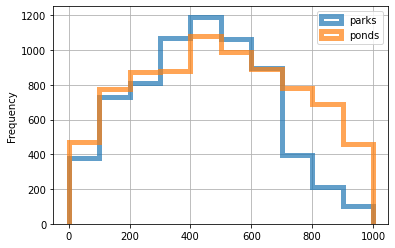

In [28]:
ax = data['parks_nearest'].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, label='parks', grid=True, legend=True, range=(0, 1000))
data['ponds_nearest'].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, label='ponds', grid=True, ax=ax, legend=True, range=(0, 1000))

In [29]:
data.loc[(data['parks_nearest'].isna()) & (data['ponds_nearest'].isna())]['total_images'].count()

10484

К сожалению, много. Заполним, сколько можем. А эти 11к оставим без изменений.

In [30]:
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data.loc[data['parks_nearest'].isna(), 'parks_nearest'].fillna(data.loc[data['parks_nearest'].isna(), 'ponds_nearest'])
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'].fillna(data.loc[data['ponds_nearest'].isna(), 'parks_nearest'])
data[['ponds_nearest', 'parks_nearest']].isna().sum()

ponds_nearest    10484
parks_nearest    10484
dtype: int64

Отлично, хотя бы какую-то часть пропусков заполнить удалось.

In [31]:
data['parks_nearest'].describe()
data['ponds_nearest'].describe()


count    11068.000000
mean       502.737261
std        270.185195
min          1.000000
25%        292.750000
50%        491.000000
75%        685.000000
max       1942.000000
Name: ponds_nearest, dtype: float64

Расстояние в метр до парка кажется странным только на первый взгляд. Возможно, дом, в котором находится квартира, находится непосредственно в парке. Но вот с прудом такое оправдание не сработает...

In [32]:
data = data.query('ponds_nearest > 10 | ponds_nearest.isna()')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21546 entries, 0 to 22244
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21546 non-null  int64  
 1   last_price            21546 non-null  float64
 2   total_area            21546 non-null  float64
 3   first_day_exposition  21546 non-null  object 
 4   rooms                 21546 non-null  int64  
 5   ceiling_height        21546 non-null  float64
 6   floors_total          21546 non-null  float64
 7   living_area           21546 non-null  float64
 8   floor                 21546 non-null  int64  
 9   is_apartment          21546 non-null  bool   
 10  studio                21546 non-null  bool   
 11  open_plan             21546 non-null  bool   
 12  kitchen_area          21546 non-null  float64
 13  balcony               21546 non-null  float64
 14  locality_name         21546 non-null  object 
 15  airports_nearest   

##### airports_nearest & city_centers_nearest я бы оставил без изменений :
- Наиболее вероятное значение подобрать не получится. Разве что можно заполнить средним по locality_name. Однако, это слишком условно.
- Медианой или средним заполнять не хочется в виду специфики данных. Судя по гистограммам, разброс значений довольно большой, особенно в аэропортах.
- Пропусков много для того, чтобы просто обрезать строки, но недостаточно много для того, чтобы переживать о них и заполнять чем-то.

В airpots_nearest есть аномалии. Лучше просто удалить эти строки.

In [33]:
print(data['airports_nearest'].describe())
data['city_centers_nearest'].describe()

count    16212.00000
mean     28779.37830
std      12642.16356
min          0.00000
25%      18658.75000
50%      26544.50000
75%      37075.50000
max      84869.00000
Name: airports_nearest, dtype: float64


count    16233.000000
mean     14287.173351
std       8871.234716
min        181.000000
25%       8945.000000
50%      13116.000000
75%      16454.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [34]:
data = data.query('airports_nearest > 100 or airports_nearest.isna()')


##### days_exposition 
Я бы не стал их чем-то заполнять. Да и пропусков не так много.

In [35]:
data['days_exposition'].describe()


count    18611.000000
mean       181.863629
std        221.175043
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### last_price
Аномалий не вижу

In [36]:
data.sort_values(by='last_price', ascending=True)['last_price'].head(20)
data.sort_values(by='last_price', ascending=False)['last_price'].head(20)

12442    763000000.0
18486    420000000.0
14057    401300000.0
1430     330000000.0
14928    300000000.0
21471    289238400.0
15661    245000000.0
13171    240000000.0
5774     230000000.0
8647     190870000.0
18782    180000000.0
18132    160000000.0
2514     159984000.0
15692    159000000.0
1026     155000000.0
7656     150000000.0
14345    150000000.0
20924    148000000.0
12164    140000000.0
3085     140000000.0
Name: last_price, dtype: float64

##### rooms
Есть квартиры с нулем комнат. Лучше вырезать эти строки. Также кажутся аномальными квартиры с более чем 10 комнатами. Но здесь нужно учитывать и площаль квартиры, поэтому вырежем те, у которых 10+ комнат и площадь меньше 280 кв.м.


In [37]:
data['rooms'].value_counts()

1     7226
2     7177
3     5327
4     1116
5      314
0      193
6      104
7       57
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [38]:
data.query('rooms >= 10')[['last_price', 'total_area', 'rooms']].head(20)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.378947,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.171729
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.410000


In [39]:
data = data.loc[(data['rooms'] < 10) | ((data['rooms'] >= 10) & (data['total_area'] >= 280))]
data = data.query('rooms != 0')

#### Изменение типов данных

##### Время

In [40]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21346 entries, 0 to 22244
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21346 non-null  int64         
 1   last_price            21346 non-null  float64       
 2   total_area            21346 non-null  float64       
 3   first_day_exposition  21346 non-null  datetime64[ns]
 4   rooms                 21346 non-null  int64         
 5   ceiling_height        21346 non-null  float64       
 6   floors_total          21346 non-null  float64       
 7   living_area           21346 non-null  float64       
 8   floor                 21346 non-null  int64         
 9   is_apartment          21346 non-null  bool          
 10  studio                21346 non-null  bool          
 11  open_plan             21346 non-null  bool          
 12  kitchen_area          21346 non-null  float64       
 13  balcony         

##### is apartment
Данные имеют тип обжект, хотя должно быть бул. Проверим, в чем дело.

In [41]:
print(data['is_apartment'].unique()) #не совсем уверен, но видимо где-то False или True было написано текстом.
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()
data['is_apartment'].unique() #кажется сработало

[False  True]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21346 entries, 0 to 22244
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21346 non-null  int64         
 1   last_price            21346 non-null  float64       
 2   total_area            21346 non-null  float64       
 3   first_day_exposition  21346 non-null  datetime64[ns]
 4   rooms                 21346 non-null  int64         
 5   ceiling_height        21346 non-null  float64       
 6   floors_total          21346 non-null  float64       
 7   living_area           21346 non-null  float64       
 8   floor                 21346 non-null  int64         
 9   is_apartment          21346 non-null  bool          
 10  studio                21346 non-null  bool          
 11  open_plan             21346 non-null  bool          
 12  kitchen_area          21346 non-null  float64       
 13  ba

array([False,  True])

In [42]:
data['floor'] = data['floor'].astype('int') #для удобства. Заодно проверим, нет ли там дробных значений.
data['balcony'] = data['balcony'].astype('int')


### Посчитайте и добавьте в таблицу новые столбцы

In [43]:
data['squere_price'] = data['last_price'] / data['total_area'] #добавляем столбец с ценой за кв. метр


In [44]:
data['weekday'] = data['first_day_exposition'].dt.weekday #столбец с днем недели публикации объявления


In [45]:
data['year'] = data['first_day_exposition'].dt.year #столбец с годом публикации

In [46]:
data['month'] = data['first_day_exposition'].dt.month #столбец с месяцем


Для того, чтобы сделать столбец с типом этажа, напишем функцию, и применим ее ко всем строкам датафрейма.

In [47]:
def floor_category(row) :
    if row['floor'] == 1 :
        return('первый')
    if row['floor'] == row['floors_total'] :
        return('последний')
    else :
        return('другой')
data['floor_category'] = data.apply(floor_category, axis=1)


In [48]:
data['km_to_center'] = (data['city_centers_nearest'] / 1000).round() #добавим столбце с округленным расстоянием до центра города в километрах
data.head() 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,kitchen_to_total,squere_price,weekday,year,month,floor_category,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,0.231481,120370.370370,3,2019,3,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,81.0,0.272277,82920.792079,1,2018,12,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2.0,574.0,558.0,0.148214,92785.714286,3,2015,8,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.378947,9,False,...,3.0,234.0,424.0,0.171729,408176.100629,4,2015,7,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,0.410000,100000.000000,1,2018,6,другой,8.0


### Проведите исследовательский анализ данных

#### Изучение параметров

##### Общая площадь

Медианное значени площади квартиры составляет 53 метра, а вот среднее - 61. Среднее получилось чуть более высоким, так как существуют квартиры с аномально высокими значениями площади (с точки зрения данных). Как я понимаю, они же и являются выбросами в ящике с усами. Эти выбросы тянут среднее вверх.
 

[[<AxesSubplot:title={'center':'total_area'}>]]


count    21346.000000
mean        61.111241
std         36.125661
min         12.000000
25%         40.600000
50%         53.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

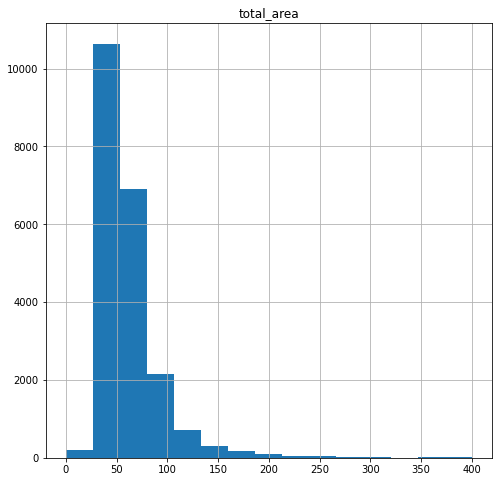

In [49]:
print(data.hist(column='total_area', range=(0,400), bins=15, figsize=(8,8)))
data['total_area'].describe()


<AxesSubplot:>

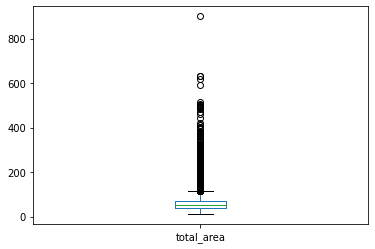

In [50]:
data['total_area'].plot.box()

##### living_area
Таким образом, медианное значение для жилой площади составляет 30 кв.м.

[[<AxesSubplot:title={'center':'living_area'}>]]


count    21346.000000
mean        35.031300
std         22.747609
min          2.000000
25%         19.000000
50%         30.300000
75%         42.631579
max        409.700000
Name: living_area, dtype: float64

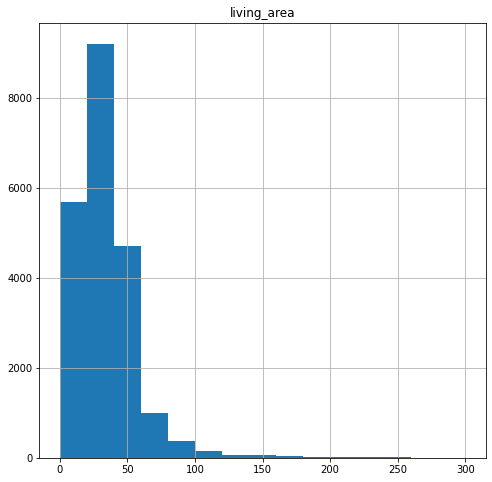

In [51]:
print(data.hist(column='living_area', range=(0,300), bins=15, figsize=(8,8)))
data['living_area'].describe()

##### kitchen_area 
Медианное значение кухни = 9, что несильно отличается от среднего = 10. Это говорит нам о том, что размеры кухонь более стандартизированны и не увеличиваются с той же скоростью, что и общая площадь квартиры. 

[[<AxesSubplot:title={'center':'kitchen_area'}>]]


count    21346.000000
mean        10.567271
std          5.924821
min          0.000000
25%          7.000000
50%          9.200000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

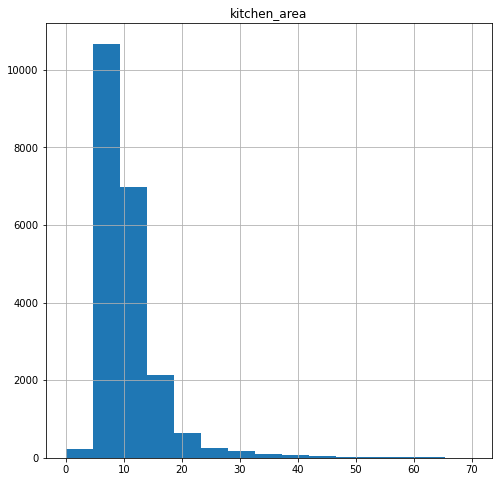

In [52]:
print(data.hist(column='kitchen_area', range=(0,70), bins=15, figsize=(8,8)))
data['kitchen_area'].describe()

##### last_price
Медианное по рынку значение стоимсоти квартиры - 5.7 млн.руб. А вот среднее составляет 8.6. Дело в сверхдорогих квартирах. Кстати, мы также видим распределение с асимметрией вправо. Медиана липнет к первому квартилю.

count    21346.000000
mean         6.618998
std         11.289981
min          0.012190
25%          3.400000
50%          4.690000
75%          6.850000
max        763.000000
Name: last_price, dtype: float64

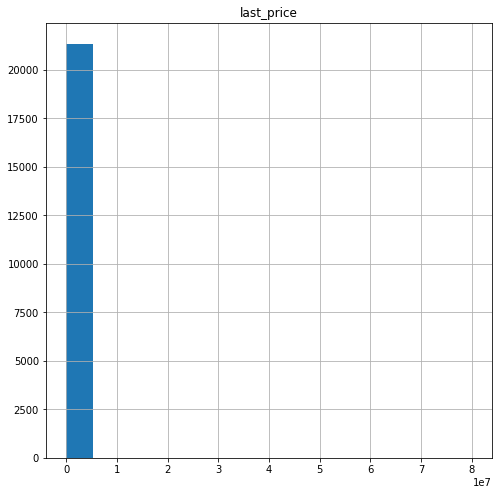

In [53]:
data['last_price'] = data['last_price'] / 1000000
data.hist(column='last_price', range=(0, 80000000), bins=15, figsize=(8,8))
data['last_price'].describe()

<AxesSubplot:>

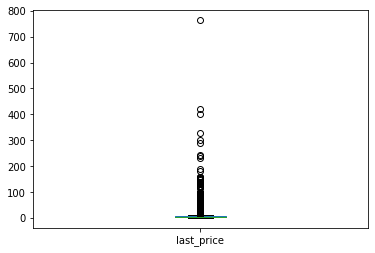

In [54]:
data['last_price'].plot.box()

##### total_rooms 
С данными все хорошо. Среднее значение совпадает с медианным и равно 2-м комнатам. 

count    21346.000000
mean         2.101377
std          1.067035
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

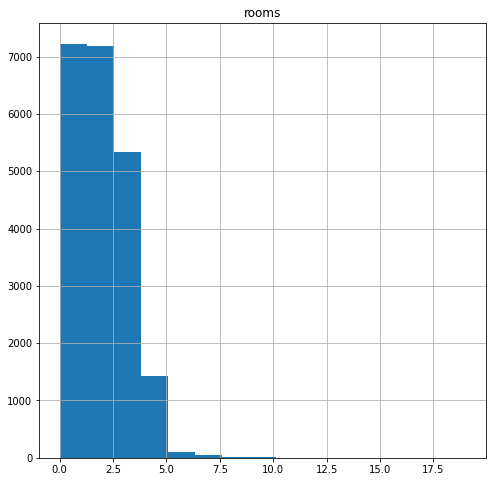

In [55]:
data.hist(column='rooms', range=(0,19), bins=15, figsize=(8,8))
data['rooms'].describe()

##### ceiling_height
Среднее значение почти совпадает с медианным. Средняя высота потолков в квартирах составляет 2.69 метров. Среднеквадратическое отклонение небольшое, что говорит о том, что высота потолков стандартизирована и мало зависит от размера квартиры или других параметров.

count    21346.000000
mean         2.699435
std          0.223475
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

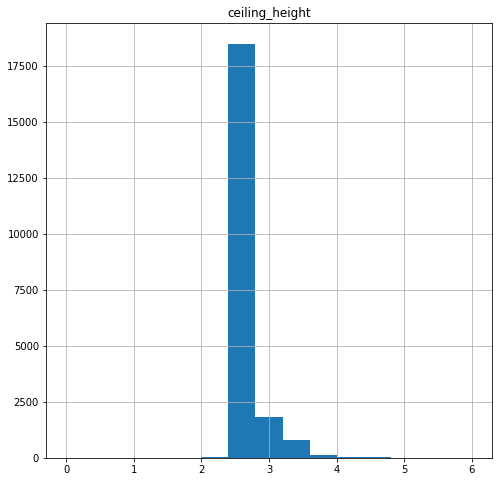

In [56]:
print(data['ceiling_height'].describe())
data.hist(column='ceiling_height', range=(0,6), bins=15, figsize=(8,8))

##### floor
Медианное значение этажа равно 4-м. Среднее значение этажа больше и равно 4-м. Высотки тянут среднее вверх.

count    21346.000000
mean         5.892814
std          4.896056
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

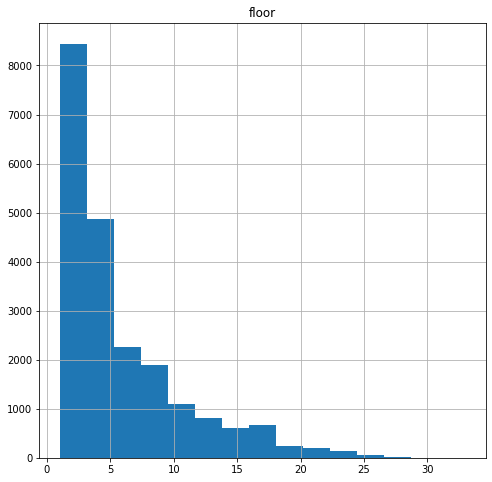

In [57]:
print(data['floor'].describe())
data.hist(column='floor', range=(1,33), bins=15, figsize=(8,8))

##### floor_category
С данными все в порядке. Сомневаюсь, что необходимо еще что-либо сказать.

count      21346
unique         3
top       другой
freq       15601
Name: floor_category, dtype: object


<AxesSubplot:>

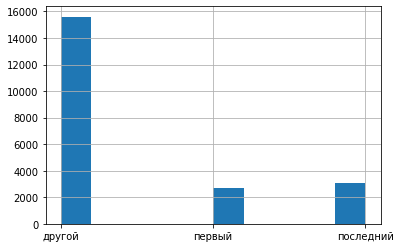

In [58]:
print(data['floor_category'].describe())
data['floor_category'].hist()

##### floors_total
Медианное значение количества этажей в доме = 9. Среднеквадратическое отклонение большое, однако распределение близко к нормальному, поэтому среднее немногим выше медианы. Странными кажется выброс на отрезке 25-27, однако думаю, что пугаться не стоит. Скорее всего, существует некий стандарт на 25-этажные здания.

count    21346.000000
mean        10.642088
std          6.628005
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

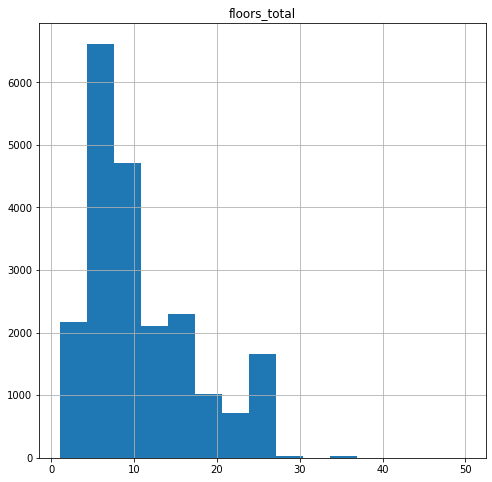

In [59]:
data.hist(column='floors_total', range=(1,50), bins=15, figsize=(8,8))
data['floors_total'].describe()


##### city_centers_nearest
Медианное расстояние до центра города = 13км. Первый квартиль отмечается 9-ю км, что немного удивляет. Можно сделать вывод о том, что квартиры в центре или близко к центру продаются в очень малых количествах. Объяснение этому наблюдению очевидное, но возможно само наблюдение пригодится позже.

count    16109.000000
mean     14296.678689
std       8892.179954
min        181.000000
25%       8936.000000
50%      13108.000000
75%      16456.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

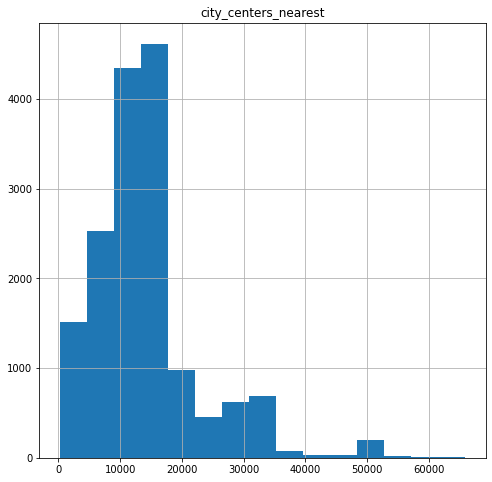

In [60]:
print(data['city_centers_nearest'].describe())
data.hist(column='city_centers_nearest', bins=15, figsize=(8,8))

##### airports_nearest

count    16088.000000
mean     28815.032571
std      12638.223937
min       6450.000000
25%      18676.000000
50%      26585.500000
75%      37095.000000
max      84869.000000
Name: airports_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

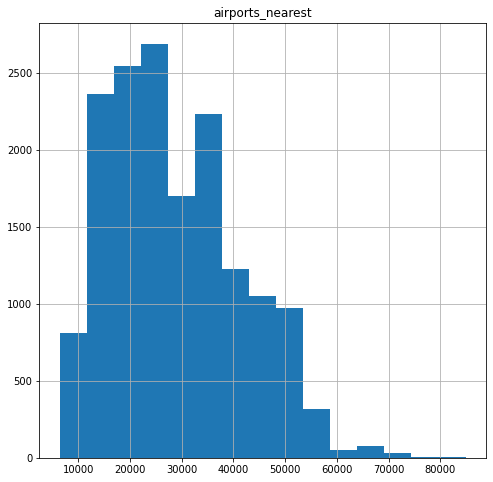

In [61]:
print(data['airports_nearest'].describe())
data.hist(column='airports_nearest', bins=15, figsize=(8,8))

##### parks_nearest
Медианное расстояние до парка = 500м. Неплохо! На 75-м перцентиле значение = 650м, что тоже недалеко. Но есть и немало квартир, находящихся на расстоянии более чем 2 км до ближайшего парка.

count    10978.000000
mean       512.165695
std        321.803189
min          3.000000
25%        302.000000
50%        479.000000
75%        655.000000
max       3190.000000
Name: parks_nearest, dtype: float64


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

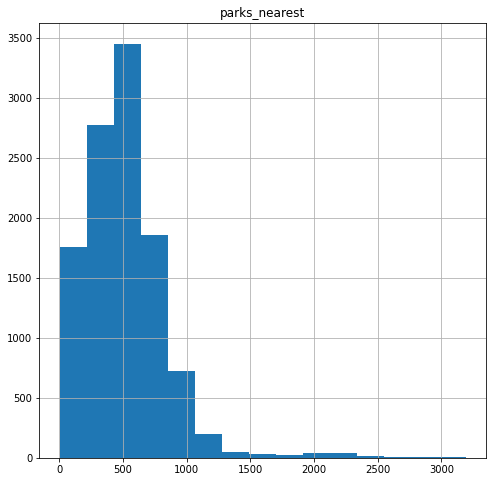

In [62]:
print(data['parks_nearest'].describe())
data.hist(column='parks_nearest', bins=15, figsize=(8,8))

##### day - month
Реже всего объявления выставляются на выходных.
Наблюдения по месяцам:
- БОльшая часть объявлений приходится на конец зимы - начало весны.
- В Мае и летом объявлений появляется меньше всего. Видимо, всем хочется гулять а не работать.
- В Декабре и Января тоже наблюдается просадка. Скорее всего, предложение реагирует на стабильное отсутствие спроса в это время. В банках выходные и праздники => ипотеку не возьмешь, да и в целом, кто будет заниматься покупкой квартиры в праздники?


count    21346.000000
mean         2.564555
std          1.787460
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


array([[<AxesSubplot:title={'center':'weekday'}>]], dtype=object)

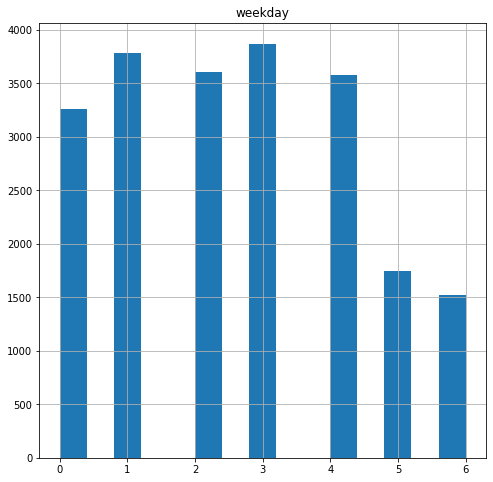

In [63]:
print(data['weekday'].describe())
data.hist(column='weekday', bins=15, figsize=(8,8))

count    21346.000000
mean         6.397217
std          3.491656
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

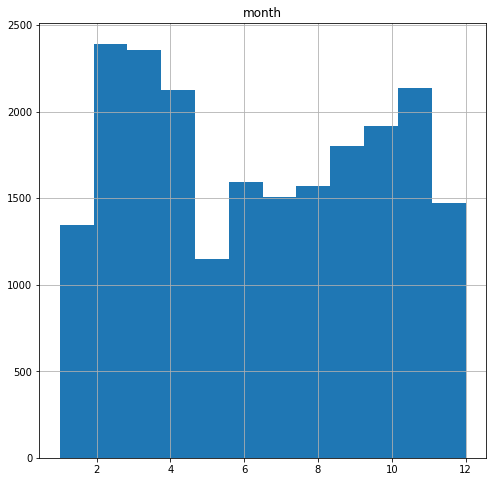

In [64]:
print(data['month'].describe())
data.hist(column='month', bins=12, figsize=(8,8))

#### Скорость продажи квартир
Медианное время продажи квартиры - 97 дней, а вот среднее - 182. Дело в большом разбросе значений с перевесом вправо. Быстрыми можно считать продажи, попадающие в первый квартиль (до 45 дней). Необычайно долгими будем считать те, которые на диаграмме размаха считаются выбросами, то есть от 500 дней.

count    18428.000000
mean       182.469611
std        221.375793
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

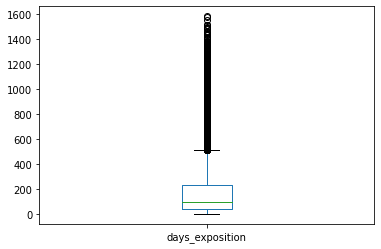

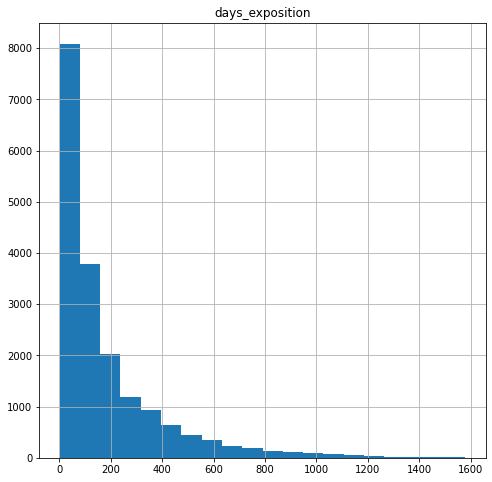

In [65]:
print(data['days_exposition'].describe())
print(data['days_exposition'].plot.box())
data.hist(column='days_exposition', bins=20, figsize=(8,8))

#### Влияние разных факторов на стоимость объекта

##### Общая площадь 
Есть несильная положительная зависимость цены от общей площади, однако начиная примерно с 300 кв.м. зависимость рассеивается. У меня есть 2 объяснения :
- Рост субъективной полезности и ценности площади квартиры, начиная с какого-то значения, растет медленно или не растет вовсе. Иными словами, квадратные метры свыше 300-от начинают казаться бесполезными и излишними.
- Таких квартир попросту мало. Возможно, что тенденция сохраняется, просто из-за небольшого количества значений ее труднее отследить.

0.6503051456443713


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

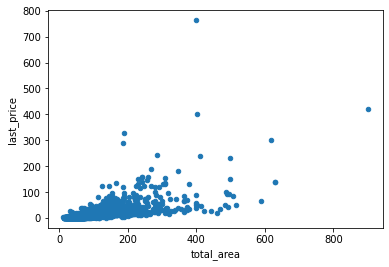

In [66]:
print(data['total_area'].corr(data['last_price']))
data.plot(x='total_area', y='last_price', kind='scatter')

##### Жилая площадь
Цена квартиры зависит от площади жилой зоны в меньшей степени, чем от площади общей зоны.  <span style="color:red"> Что это значит?</span>

0.5836447659469505


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

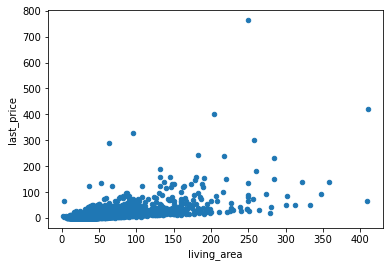

In [67]:
print(data['living_area'].corr(data['last_price']))
data.plot(x='living_area', y='last_price', kind='scatter')

##### Площадь кухни
Цена квартира зависит от площади кухни слабо, слабее чем от общей площади и от жилой площади. Очень странная картина:
В нашей упрощенной картине мира living_area + kitchen_area = total_area. 
total_area коррелирует с ценой квартиры в большей степени, чем living_area. Как я понимаю, это должно означать, что оставшаяся площадь (в нашем случае только kitchen_area) должна влиять на цену квартиры больше, чем living_area. Но мы видим обратное. Мне не хватает знания статистики, чтобы сделать какой-то законченный вывод.

Если говорить про наблюдения на диаграмме, то они по смыслу совпадут с наблюдениями из 4.3.1

0.516645471187318


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

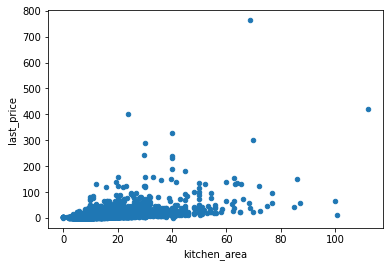

In [68]:
print(data['kitchen_area'].corr(data['last_price']))
data.plot(x='kitchen_area', y='last_price', kind='scatter')

##### rooms

По графику мы видим положительную зависимость между количеством комнат в квартире и средней стоимостью. Начиная со значения rooms=8 плавный рост прекращается, однако думаю, что дело исключительно в малом количестве квартир с таким количеством комнат.

0.3631952825002791


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

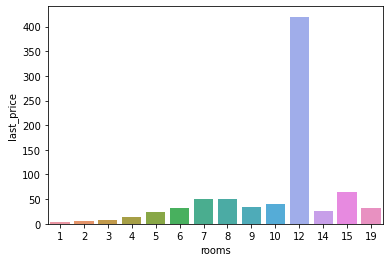

In [69]:
print(data['rooms'].corr(data['last_price']))
data_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
data_rooms = data_rooms.reset_index()
sb.barplot(data=data_rooms, x='rooms', y='last_price')



##### Этаж
Средняя цена квартир на первом этаже самая низкая среди всех категорий. Самая высокая средняя цена на квартиры в категории "последний". 

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

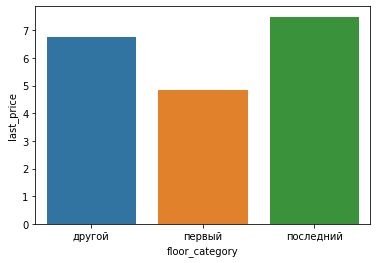

In [70]:
data_floor_category = data.pivot_table(index='floor_category', values='last_price', aggfunc='mean')
data_floor_category = data_floor_category.reset_index()
sb.barplot(data=data_floor_category, x='floor_category', y='last_price')

##### Даты размещения 


###### weekday
Все ровно.

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

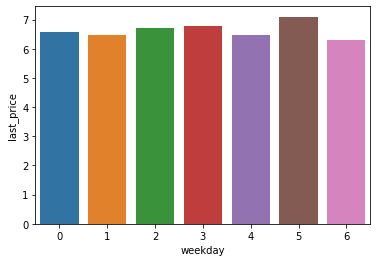

In [71]:
data_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
data_weekday = data_weekday.reset_index()
sb.barplot(data=data_weekday, x='weekday', y='last_price')

###### month
Все ровно.

<AxesSubplot:xlabel='month', ylabel='last_price'>

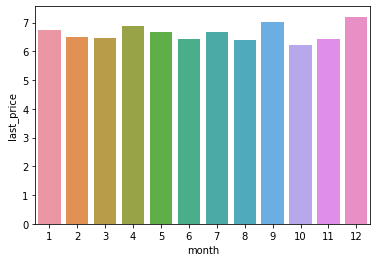

In [72]:
data_month = data.pivot_table(index='month', values='last_price', aggfunc='mean')
data_month = data_month.reset_index()
sb.barplot(data=data_month, x='month', y='last_price')

###### year
- У заявлений, опубликованных в 14 году средняя цена на жилье была самой высокой и была вдвое больше, чем у объявлений, опубликованных 18. 
- С 14 по 18 год включительно наблюдалось стабильное снижение средней цены на жилье, 

<AxesSubplot:xlabel='year', ylabel='last_price'>

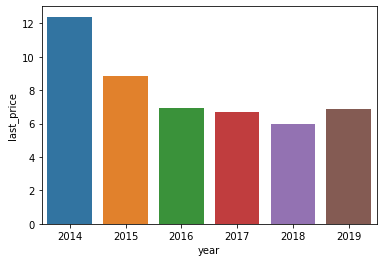

In [73]:
data_year = data.pivot_table(index='year', values='last_price', aggfunc='mean')
data_year = data_year.reset_index()
sb.barplot(data=data_year, x='year', y='last_price')


#### Средняя цена за квадратный метр для разных населенных пунктов
Самый дорогой квадратный метр в самом Санкт-Петербурге. Затем идет Зеленогорск. Самый дешевый квадратный метр в сельском поселении Старополье.

In [74]:
medium_sqr_price = data.pivot_table(index='locality_name', values='squere_price', aggfunc='median').sort_values(by='squere_price', ascending=False)
print(medium_sqr_price.head(10))
print()
print('Населенный пункт с самой большой стоимостью за кв. метр:', medium_sqr_price.idxmax())
print('Населенный пункт с самой маленькой стоимостью за кв. метр и его значение:', medium_sqr_price.idxmin(), medium_sqr_price.min()) 

                    squere_price
locality_name                   
санкт-петербург    105103.572961
зеленогорск        101666.666667
кудрово             99781.727471
сестрорецк          99759.615385
пушкин              99744.245524
поселок левашово    96997.690531
поселок парголово   91780.224134
деревня кудрово     91666.666667
деревня мистолово   90888.888889
мурино              89928.057554

Населенный пункт с самой большой стоимостью за кв. метр: squere_price    санкт-петербург
dtype: object
Населенный пункт с самой маленькой стоимостью за кв. метр и его значение: squere_price    деревня старополье
dtype: object squere_price    11000.0
dtype: float64


#### Зависимость цены квартиры от расстояния до центра
Мы видим отрицительную зависимость средней цены на квартиры от расстояния до центра. Особенно ярко она проявляется на отрезке от 0 до 12 км, далее зависимость становится почти незаметной.
Наблюдение, которое сразу бросается в глаза: большинство элитных квартир расположено в центре города или в радиусе 8 км.

<AxesSubplot:xlabel='km_to_center'>

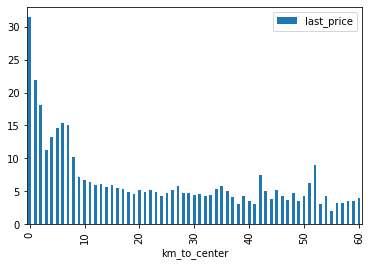

In [75]:
data_km = data.pivot_table(index='km_to_center', values='last_price', aggfunc='mean')
data_km = data_km.reset_index()
data_km.plot(kind='bar', x='km_to_center', y = 'last_price', xticks=(0, 10, 20, 30, 40, 50, 60))


### Общий вывод

 
#### Самые важные зависимости и наблюдения
- Больше всего (среди имеющихся параметров) цена квартиры зависит от общей площади. Однако, начиная примерно с 300-т метров эта зависимость рассеивается. Скорее всего, эти метры в глазах покупателей становятся попросту излишними.
От жилой площади цена квартиры зависит в меньше степени, однако и зависимость от площади кухни тоже меньше, чем от общей площади, что кажется странным. Однако для какого-либо заключения необходимо провести дополнительное исследование с более разнообразными данными.
- Существует положительная корреляция между количеством комнат в квартире и ее стоимостью
- В среднем квартиры на первым этаже стоят дешевле всего, а квартиры на последнем - самые дорогие
- С 14 по 18 год средняя стоимость квартир в рублях снижается. Однако для более подробного изучения динамики цен необходимо изучить цены на квартиры в зависимости от даты продажи, а не размещения.
- Существует отрицательная зависимость между расстоянием от центра города и средней ценой на квартиры. Подавляющее большинство элитной недвижимости расположено в центре города или в радиусе 8 км.
- Самый дорогой квадратный метр в Питере и Зеленограде, а самый дешевый, как правило, в поселках.



#### Категории квартир
Мы можем грубо поделить квартиры в Питере и Лен. области на 3 категории и дать каждой из них характеристику:
##### Элитное жилье и жилье бизнес класса
- Стоимость от 6 миллионов
- Расположено в радиусе 8 км от центра города
- Этаж последний
- Площадь от 250 метров

##### Жилье комфорт-класса
- Стоимость от 3 до 6 миллионов
- Расположено в пределах 20 км от центра
- Этаж между первым и последним
- Площадь до 250-ти метров

##### Жилье эконом класса 
- Стоимость до 3 миллионов
- Расположено в пределах от 10 до 30 км от центра
- Этаж любо1
- Площадь до 150 метров

#### Параметры, которые не являются значимыми и/или стандартизированны во всех трех категориях:
- Площадь кухни
- Высота потолков
- Расстояние до аэропорта
- День и месяц размещения








